## Task 1 - Prediction using Supervised ML

## Submitted by: Daniyal Mehmood

### Importing the required libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

sns.set_context('paper')

### Loading the data into a dataframe

In [13]:
datapath = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(datapath)

In [14]:
#To display the five top rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
#To display the five bottom rows of the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Exploratory Data Analysis

We'll now look at the data to check out its properties and attributes

In [16]:
#To get a concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
#Checking the data types of the attributes
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [18]:
#Counting the number of rows and columns

print("Number of rows in the data: ", data.shape[0])
print("Number of columns in the data: ", data.shape[1])

Number of rows in the data:  25
Number of columns in the data:  2


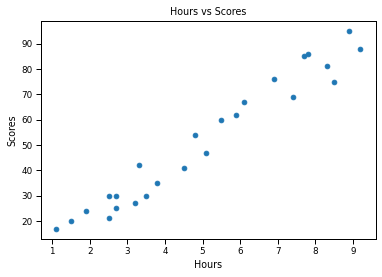

In [19]:
#Scatter plot of Hours vs Scores

ax = plt.axes()

ax.scatter(data.Hours, data.Scores)

#Label the axes
ax.set(xlabel='Hours', ylabel='Scores', title = 'Hours vs Scores');

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


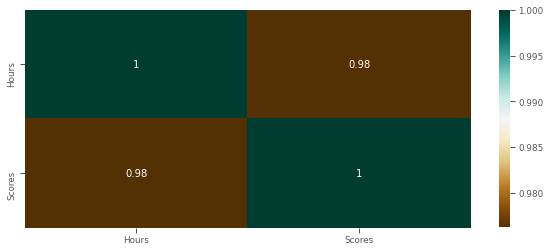

In [30]:
#The heatmap shows that the scores have a strong relationship with the number of hours

plt.figure(figsize=(10,4))
hmap = data.corr()
sns.heatmap(hmap,cmap="BrBG",annot=True)
hmap

In [21]:
#Checking out whether there are any null values in the dataset

data.isnull().sum().sort_values()

Hours     0
Scores    0
dtype: int64

## Model Training

### Splitting the data

In [22]:
#Dividing the data into features and labels

X = np.array(data.drop(['Scores'], 1))
Y = np.array(data['Scores'])

In [23]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y)

### Fitting the model

In [24]:
linear = linear_model.LinearRegression()

In [25]:
#Fitting the model with our training data

linear.fit(x_train, y_train)

LinearRegression()

In [26]:
#Printing the accuracy of our model

accu = linear.score(x_test, y_test)
print(accu)

0.939570458865053


In [27]:
print("Coefficients: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficients: 
 [9.95666144]
Intercept: 
 2.100525542354724


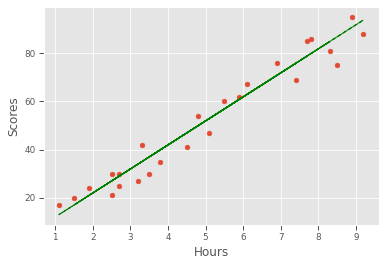

In [28]:
style.use("ggplot")

regg_line = linear.coef_*x_train+linear.intercept_

plt.scatter(data['Hours'], data["Scores"])
plt.plot(x_train, regg_line, 'g--')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

### Predicting Results

In [29]:
#Predicting the score for a student who studies for 9.25hrs per day

prediction = linear.predict([[9.25]])

print(prediction)

[94.19964383]
